<a href="https://colab.research.google.com/github/Diya1s/deep-learning/blob/main/pract6_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# 1. Load CIFAR-10 and take a mini subset (3 classes: airplane, car, bird)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = [0, 1, 2]  # airplane, car, bird
mask_train = np.isin(y_train, classes).flatten()
mask_test = np.isin(y_test, classes).flatten()

x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# remap labels to 0..2
label_map = {c: i for i, c in enumerate(classes)}
y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])

/tmp/ipython-input-420218966.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-420218966.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [10]:
# 2. Build simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 3. Train
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.2, verbose=2)

# 4. Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")
print("\nClassification Report:\n",
      classification_report(y_test, np.argmax(model.predict(x_test), axis=1)))


Epoch 1/10
375/375 - 17s - 45ms/step - accuracy: 0.7412 - loss: 0.6169 - val_accuracy: 0.8247 - val_loss: 0.4508
Epoch 2/10
375/375 - 18s - 48ms/step - accuracy: 0.8282 - loss: 0.4280 - val_accuracy: 0.8543 - val_loss: 0.3895
Epoch 3/10
375/375 - 17s - 46ms/step - accuracy: 0.8577 - loss: 0.3668 - val_accuracy: 0.8440 - val_loss: 0.4019
Epoch 4/10
375/375 - 15s - 40ms/step - accuracy: 0.8730 - loss: 0.3298 - val_accuracy: 0.8650 - val_loss: 0.3505
Epoch 5/10
375/375 - 15s - 40ms/step - accuracy: 0.8856 - loss: 0.2938 - val_accuracy: 0.8717 - val_loss: 0.3362
Epoch 6/10
375/375 - 15s - 41ms/step - accuracy: 0.9004 - loss: 0.2584 - val_accuracy: 0.8807 - val_loss: 0.3294
Epoch 7/10
375/375 - 15s - 40ms/step - accuracy: 0.9061 - loss: 0.2383 - val_accuracy: 0.8603 - val_loss: 0.3672
Epoch 8/10
375/375 - 21s - 55ms/step - accuracy: 0.9219 - loss: 0.2075 - val_accuracy: 0.8707 - val_loss: 0.3508
Epoch 9/10
375/375 - 15s - 40ms/step - accuracy: 0.9293 - loss: 0.1808 - val_accuracy: 0.8847 - 

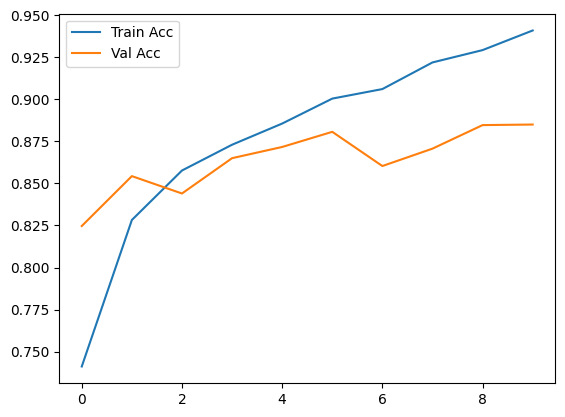

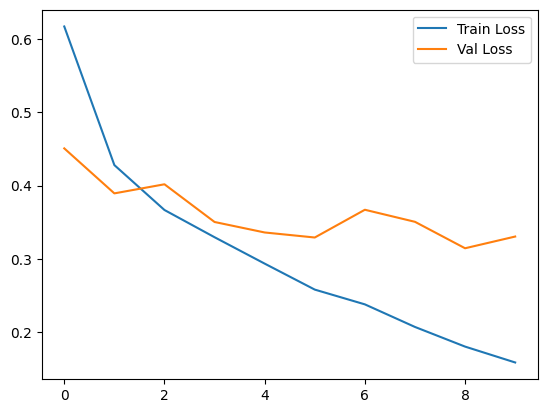

In [12]:
# 5. Plot accuracy & loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.show()